<a href="https://colab.research.google.com/github/ohjisu320/study_AIs/blob/main/docs/quests/NLPs/wordcloud_regex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글폰트설정

In [1]:
# !apt-get -y install fonts-nanum
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

## read excel file with sheets

In [2]:
import pandas as pd
df_OWG = pd.read_excel('OneWord_Game.xlsx', sheet_name=None)

In [3]:
df_sheets = []
for sheet_name, df in df_OWG.items() :
  df_sheets.append(df)
  print(f'{sheet_name}, {type(df)}')
  pass

len(df_sheets)

2월, <class 'pandas.core.frame.DataFrame'>
1월, <class 'pandas.core.frame.DataFrame'>
12월, <class 'pandas.core.frame.DataFrame'>


3

## 데이터 전처리

In [4]:
df_sheets[0].columns

Index([     '            ',        'Unnamed: 1', 2024-02-15 00:00:00,
       2024-02-14 00:00:00, 2024-02-13 00:00:00, 2024-02-07 00:00:00,
       2024-02-06 00:00:00, 2024-02-05 00:00:00, 2024-02-02 00:00:00,
       2024-02-01 00:00:00],
      dtype='object')

In [5]:
# column 이름 변환
for x in [0,1,2]:
  df_sheets[x].rename(columns={'            ': 'name'}, inplace=True)
  pass

df_sheets[2].rename(columns={'      ': 'name'}, inplace=True)

In [6]:
# 내 이름만 빼기
contents_list = []
for x in range(len(df_sheets)) :
  condition = 'name=="오지수"'
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]
  contents_list.append(contents)
  pass


<ipython-input-6-275063672ee9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]
<ipython-input-6-275063672ee9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]
<ipython-input-6-275063672ee9>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  contents = df_sheets[x].query(condition).drop(columns='name').dropna(1).values.tolist()[0]


In [128]:
# 다 합치기

text_list = []
for x in range(len(contents_list)) :
  text = ' '.join(contents_list[x])
  text_list.append(text)
text = ''.join(text_list)
text

"regular expression Encoding\n범주형 데이터를 숫자형 데이터로 변환하는 과정을 말한다. 이 과정은 군집화나 머신러닝 알고리즘을 적용할 때  컴퓨터가 데이터를 더 잘 이해하고 처리할 수 있게 하기 위해 필요하다.  강화학습(reinforcement learning)\n문제와 정답을 알려주지 않고, 환경에 던져 준 후 시행착오를 통해 보상을 최대화하는 방향으로 학습하는 방법을 말한다.  알파고가 강화학습의 대표적인 예로, 복잡한 환경에서 최적의 결정을 내리는 문제를 해결할 수 있다. 데이터 전처리\n결측치나 이상치를 분석에 적합한 형태로 가공하고 정제하는 과정을 말한다. 잘못된 데이터가 포함되어 있으면 분석 결과의 정확성이 떨어질 수 있기 때문에 데이터 전처리 과정이 필요하다. PDA(Predictive Data Analysis)\n데이터 간 관계를 학습한 것을 토대로 수식화, 일반화해서 새로운 데이터에 대해 예측하는 방식의 데이터 분석을 말한다.\n새로운 데이터로 다음 상황을 예측해서 비지니스 전략을 수립하는 등 의사결정을 내리기 위해 사용한다. 기대빈도수(expected frequencies)\n어떤 사건이 일어날 것으로 예상되는 빈도수를 의미한다. 어떤 사건이 발생할 빈도수, 확률을 예측하기 위해 구해진다.\n 상관계수(correlation coefficient)\n두 연속형 변수간의 상관관계를 분석한 수치이다. 양의 상관관계를 띄는지, 음의 상관관계를 띄는지, 아니면 상관관계가 없는지를 판별해서 변수 간의 관계를 해석할 수 있다. 산점도(scatter plot)\n2개의 연속형 변수를 이용해 점을 찍어 만든 통계 그래프이다. 연속형 변수 간의 상관관계를 파악하거나 데이터의 분포를 확인하기 위해 사용한다.pandas - .index\nseries나 dataframe의 index를 추출해주는 메소드이다. 행을 식별해서 데이터를 분석, 시각화하기 위해 사용한다. Series\nindex를 나타내고 value를 하나의 열에 담아 나타내는 데

In [130]:
# 조사 제외
import re
patterns = '(때문에 |말한다|위해서|한다| 통해 |하다|이를|이나|이다|있다|으로 |있게|있는 |위해|되어|하기 |했 |할|되고|되는|된다|까지|하지|같다|같은|같아|하여|할수|하고|하는이다|있는|의 |것|갓 | 간  |\\n|를 |\.|\, |로 |은 |을 |에 |수 | 수|이 |할 |나 |\(|\)|\-)|때'
text_regex = re.sub(pattern=patterns,repl=' ',string=text)
text_regex

"regular expression Encoding 범주형 데이터 숫자형 데이터 변환하는 과정     과정 군집화 머신러닝 알고리즘 적용     컴퓨터가 데이터 더 잘 이해  처리        필요    강화학습 reinforcement learning  문제와 정답 알려주지 않고 환경 던져 준 후 시행착오 통해 보상 최대화하는 방향 학습하는 방법     알파고가 강화학습 대표적인 예로 복잡한 환경에서 최적 결정 내리는 문제 해결      데이터 전처리 결측치 이상치 분석 적합한 형태 가공  정제하는 과정    잘못된 데이터가 포함  있으면 분석 결과 정확성 떨어질  있기  데이터 전처리 과정 필요   PDA Predictive Data Analysis  데이터 간 관계 학습한   토대 수식화 일반화해서 새로운 데이터 대해 예측하는 방식 데이터 분석    새로운 데이터 다음 상황 예측해서 비지니스 전략 수립하는 등 의사결정 내리기   사용   기대빈도수 expected frequencies  어떤 사건 일어날   예상  빈도수 의미   어떤 사건 발생  빈도수 확률 예측   구해진다   상관계수 correlation coefficient  두 연속형 변수간 상관관계 분석한 치   양 상관관계 띄는지 음 상관관계 띄는지 아니면 상관관계가 없는지 판별해서 변 간 관계 해석      산점도 scatter plot  2개 연속형 변수 이용해 점 찍어 만든 통계 그래프   연속형 변 간 상관관계 파악하거 데이터 분포 확인   사용  pandas    index series dataframe index 추출해주는 메소드   행 식별해서 데이터 분석 시각화   사용   Series index 나타내고 value 하나 열 담아 나타내는 데이터타입   단일데이터 표 형식 담아 다른 Series와 연산 결측치 확인 이상치 확인 등 리스트보다 더 많 분석        자바스크립트   오브젝트 파이썬에서 dictionary와 유사한 데이터 타입 키와 밸류 값 묶음 형식 이루어져  

In [139]:
text_split = text_regex.split()
text_split[:2], len(text_split)

(['regular', 'expression'], 567)

In [140]:
from collections import Counter
text_split_count = Counter(text_split)
# text_split_count

In [141]:
series = pd.Series(text_split_count).sort_values(ascending=False)[:30]

In [142]:
# !pip install soynlp


## wordcloud 만들기

In [143]:
from wordcloud import WordCloud
wordCloud = WordCloud(background_color='white', font_path='/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf')

In [144]:
wordCloud.generate_from_frequencies(series)

In [145]:
wordCloud.words_

{'데이터': 1.0,
 '사용': 0.42857142857142855,
 '분석': 0.3333333333333333,
 '과정': 0.3333333333333333,
 '웹': 0.2857142857142857,
 '스타일': 0.23809523809523808,
 '안': 0.23809523809523808,
 '정보': 0.23809523809523808,
 '형식': 0.19047619047619047,
 '하는': 0.19047619047619047,
 '형태': 0.19047619047619047,
 '어떤': 0.19047619047619047,
 '간': 0.19047619047619047,
 '상관관계': 0.19047619047619047,
 '목적': 0.14285714285714285,
 '연속형': 0.14285714285714285,
 '다른': 0.14285714285714285,
 '명령어': 0.14285714285714285,
 'class': 0.14285714285714285,
 '컬럼': 0.14285714285714285,
 '값': 0.14285714285714285,
 '확인': 0.14285714285714285,
 '코드': 0.14285714285714285,
 '단위': 0.14285714285714285,
 '다양한': 0.14285714285714285,
 'value': 0.14285714285714285,
 '개별': 0.14285714285714285,
 '등': 0.14285714285714285,
 '기능': 0.14285714285714285,
 '파라미터': 0.14285714285714285}

### 완성!

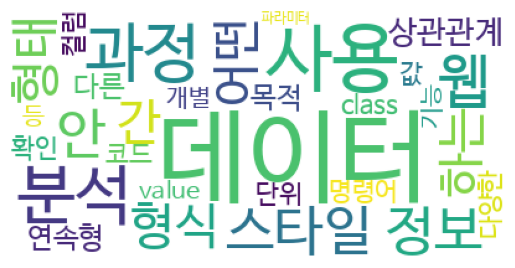

In [146]:
import matplotlib.pyplot as plt
plt.imshow(wordCloud)
plt.axis('off')
plt.show()